# Classification Project

In [11]:
# Required libraries
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

### Task 2

In [12]:
data = sio.loadmat("MNist_ttt4275/data_all.mat")

# Extract the data
testv = data["testv"]
testlab = data["testlab"].flatten()
num_test = data["num_test"][0][0]

trainv = data["trainv"]
trainlab = data["trainlab"].flatten()
num_train = data["num_train"][0][0]

vec_size = data["vec_size"][0][0]

# Create vector consisting of test and train images
test_images = []
train_images = []

for i in range(num_test):
   test_images.append(testv[i, :].reshape((28,28)))
   
for i in range(num_train):
   train_images.append(trainv[i, :].reshape((28,28)))

test_images = np.array(test_images)
train_images = np.array(train_images)

### Necessarry functions

In [13]:
# Calculates error rate

def error_rate(predicted_labels, true_labels):
    n = len(predicted_labels)
    error = 0
    for i in range (n):
        if predicted_labels[i] != true_labels[i]: error += 1
    return error/n

In [14]:
# Confusion Matrix

def confusion_matrix(predicted_labels):
    predicted_labels = np.array(predicted_labels).flatten()

    confusion_matrix = np.zeros((10, 10)) #TP, FP, FN, TN
    missclassified_idx = []

    for i in range(num_test):
        confusion_matrix[testlab[i]][[predicted_labels[i]]] += 1
        if testlab[i] != predicted_labels[i]:
            missclassified_idx.append(i)

    print(np.array_str(confusion_matrix, precision=2, suppress_small=True))

    return missclassified_idx

### Task 2.1 a)

In [88]:
# Individual nearest Neighborhood classifier

def nnclassifier(new_image):
    nearest_class = trainlab[0]
    current_distance = np.linalg.norm(train_images[0] - new_image)
    for i in range(1, num_train):
        new_distance = np.linalg.norm(train_images[i] - new_image)
        if current_distance > new_distance:
            current_distance = new_distance
            nearest_class = trainlab[i]
    return nearest_class

In [ ]:
# Nearest Neighborhood Classifier using cdist
def nnclassifier():
    n_chunks = num_test//1000 # number of chunks
    predicted_labels = []
    for i in range(n_chunks):
        test_chunk = testv[1000*i: 1000*(i+1)] # extract chunks
        distance_matrix = cdist(test_chunk, trainv, metric='euclidean') # Calculates the euclidean distance between each image in the test chunk and all the training images
        nearest_indices = np.argmin(distance_matrix, axis=1) # finds the indices of the images that where closest
        predicted_labels.extend(trainlab[nearest_indices]) # finds the label of the image that was closest
    return predicted_labels

predicted_labels = nnclassifier()


Confusion matrix

In [178]:
missclassified_idx = confusion_matrix(predicted_labels)

[[ 973.    1.    1.    0.    0.    1.    3.    1.    0.    0.]
 [   0. 1129.    3.    0.    1.    1.    1.    0.    0.    0.]
 [   7.    6.  992.    5.    1.    0.    2.   16.    3.    0.]
 [   0.    1.    2.  970.    1.   19.    0.    7.    7.    3.]
 [   0.    7.    0.    0.  944.    0.    3.    5.    1.   22.]
 [   1.    1.    0.   12.    2.  860.    5.    1.    6.    4.]
 [   4.    2.    0.    0.    3.    5.  944.    0.    0.    0.]
 [   0.   14.    6.    2.    4.    0.    0.  992.    0.   10.]
 [   6.    1.    3.   14.    5.   13.    3.    4.  920.    5.]
 [   2.    5.    1.    6.   10.    5.    1.   11.    1.  967.]]


In [176]:
error_rate(predicted_labels, testlab)

0.0309

### Task 2.1 b)
Plotting some misclassified images

Actual label is:  8
Predicted label is:  5


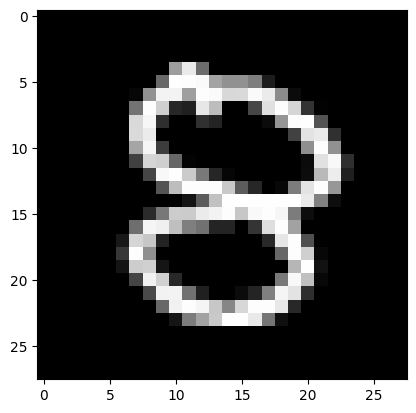

Actual label is:  4
Predicted label is:  1


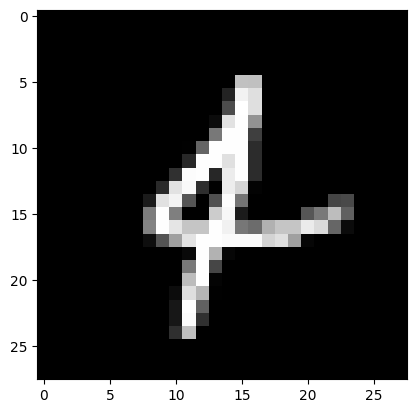

Actual label is:  9
Predicted label is:  7


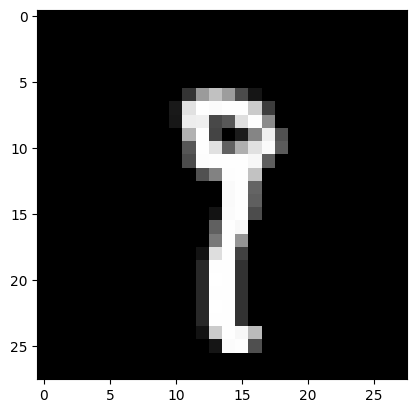

Actual label is:  2
Predicted label is:  7


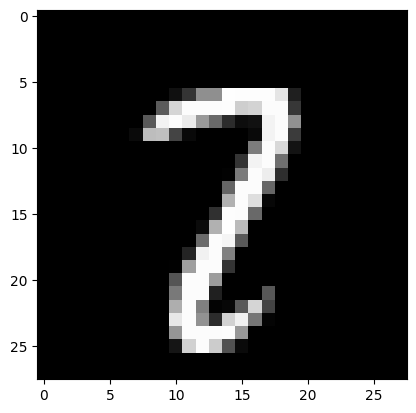

Actual label is:  6
Predicted label is:  4


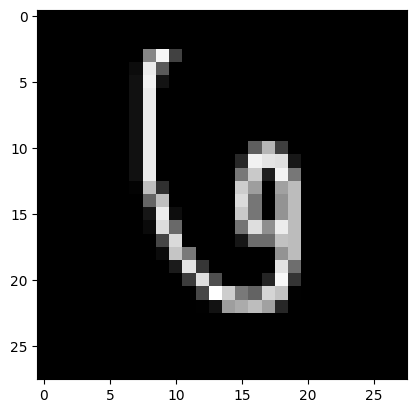

In [179]:
def image_info(idx):
    print("Actual label is: ", testlab[idx])
    print("Predicted label is: ", predicted_labels[idx])
    plt.imshow(test_images[idx], cmap="gray")
    plt.show()
    
image_info(missclassified_idx[3])
image_info(missclassified_idx[4])
image_info(missclassified_idx[5])
image_info(missclassified_idx[6])
image_info(missclassified_idx[7])

### Task 2.2 a)

### Clustering

In [184]:
from sklearn.cluster import KMeans

M = 64
train_v = {}
C = []

for i in np.unique(trainlab):
    train_v[i] = trainv[trainlab == i]

for i in train_v.keys():
    kmeans = KMeans(n_clusters=M, random_state=42)
    _ = kmeans.fit_predict(train_v[i]) # 
    C.extend(kmeans.cluster_centers_) #Extrancts cluster centers and ads them to C

print(len(C))

640


Classifying the elements using clustering

In [133]:
# Nearest Neighborhood Classifier using cdist
def nnclassifier_clustering():
    all_labels = np.concatenate([[i]*64 for i in range(10)])  # 64 labels per digit
    predicted_labels = []

    n_chunks = num_test//1000
    for i in range(n_chunks):
        test_chunk = testv[1000*i: 1000*(i+1)]
        distance_matrix = cdist(test_chunk, C, metric='euclidean')
        nearest_indices = np.argmin(distance_matrix, axis=1)
        predicted_labels.extend(all_labels[nearest_indices])
        
    return predicted_labels

predicted_labels_clustering = nnclassifier_clustering()

In [171]:
# Confusion Matrix

confusion_matrix(predicted_labels_clustering)

[[ 966.    1.    3.    1.    0.    4.    3.    1.    0.    1.]
 [   0. 1126.    3.    1.    0.    0.    3.    0.    1.    1.]
 [   9.    8.  979.    8.    1.    0.    3.   11.   12.    1.]
 [   0.    0.    7.  940.    1.   32.    0.    6.   17.    7.]
 [   1.    6.    2.    0.  922.    0.   10.    4.    3.   34.]
 [   3.    1.    0.   20.    2.  845.    9.    1.    7.    4.]
 [   8.    3.    2.    0.    3.    3.  935.    0.    3.    1.]
 [   0.   20.    8.    0.    4.    1.    0.  961.    2.   32.]
 [   5.    1.    3.   11.    3.   20.    2.    6.  917.    6.]
 [   5.    6.    4.    5.   30.    1.    1.   19.    6.  932.]]


In [138]:
error_rate(predicted_labels_clustering, testlab)

0.0477

### KNN with K = 7

In [143]:
# K - Nearest Neighborhood Classifier using cdist and K = 7
def KNN_classifier(k = 7):
    n_chunks = num_test//1000
    predicted_labels = []
    for i in range(n_chunks):
        test_chunk = testv[1000*i: 1000*(i+1)]
        distance_matrix = cdist(test_chunk, trainv, metric='euclidean')
        k_nearest_indices = np.argpartition(distance_matrix, k)[:, :k] # returns the indices of the k closest images

        for test_idx in range(len(test_chunk)):
            nearest_labels = trainlab[k_nearest_indices[test_idx]]
            counts = np.bincount(nearest_labels)
            most_frequent_label = np.argmax(counts)
            predicted_labels.append(most_frequent_label)

    return predicted_labels

predicted_labels_KNN = KNN_classifier()

In [173]:
# Confusion Matrix
confusion_matrix(predicted_labels_KNN)

[[ 974.    1.    1.    0.    0.    1.    2.    1.    0.    0.]
 [   0. 1133.    2.    0.    0.    0.    0.    0.    0.    0.]
 [  11.    8.  988.    2.    1.    0.    2.   16.    4.    0.]
 [   0.    3.    2.  976.    1.   12.    1.    7.    4.    4.]
 [   1.    8.    0.    0.  945.    0.    5.    1.    1.   21.]
 [   5.    0.    0.    8.    2.  866.    4.    1.    2.    4.]
 [   6.    3.    0.    0.    3.    2.  944.    0.    0.    0.]
 [   0.   25.    3.    0.    1.    0.    0.  989.    0.   10.]
 [   6.    4.    6.   11.    7.   12.    1.    6.  916.    5.]
 [   5.    6.    3.    6.    8.    4.    1.   11.    2.  963.]]


In [164]:
error_rate(predicted_labels_KNN, testlab)

0.0306

<!--  -->